<a href="https://colab.research.google.com/github/ziatdinovmax/atomai/blob/dev/examples/notebooks/atomai_atomstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short tutorial on how to use *atomstat* module

Prepared by Maxim Ziatdinov

E-mail: maxim.ziatdinov@ai4microscopy.com

## Install AtomAI

Installation:

In [5]:
!pip install -q git+https://github.com/ziatdinovmax/atomai.git

Import modules:

In [0]:
import atomai as aoi
import numpy as np

Download the trained weights and test image:

In [0]:
download_link = 'https://drive.google.com/uc?id=1o8JM9vckfrd9bpq-LkY2R06yzzbCdg6S'
!gdown -q $download_link -O 'test_data.zip'
!unzip -qq -j 'test_data.zip'

## Ferroic blocks analysis with atomstat

First we need to load the trained model. To do this, we specify a path to file with the trained weights and model specifics (saved by ```atomai.atomnet.trainer```) We are going to use the weights trained in the [atomai-atomnet notebook](https://colab.research.google.com/github/ziatdinovmax/atomai/blob/master/examples/notebooks/atomai_atomnet.ipynb#scrollTo=XGxhL7ha1Y3R). By default all models that we train are *dilUnet*.

In [0]:
# Path to file with trained weights
model_dict_path = '/content/bfo_model_dict.tar'
# load the weights into the model skeleton
model = aoi.load_model(model_dict_path)

Make a prediction with the loaded model:

(notice that ```aoi.atomnet.predictor``` also returns an input to a neural network in case there were some changes (e.g. padding) made to image(s) before feeding it (them) into the network)

In [3]:
# Load experimental data
expdata = np.load('bfo_test_img.npy')
# Get NN output with coordinates and classes
nn_input, (nn_output, coordinates) = aoi.atomnet.predictor(
    expdata, model, use_gpu=False).run()

1 image was decoded in approximately 4.8323 seconds


Here we are going to use *atomstat* module to get local image descriptors first (i.e. stack of subimages around one of the atom types) and then perform different types of statistical analysis on them. This is similar to what we did in *Applied Physics Letters 115, 052902 (2019)* (although here we are going to use a different model and the image was downsized by a factor of 2 to allow faster inference, without using a GPU).

Get local descriptors, which are subimages centered on one of the sublattices:

In [0]:
imstack = aoi.atomstat.imlocal(nn_output, coordinates, crop_size=16, coord_class=1)

Compute PCA scree plot to estimate the number of components/sources for the multivariate analysis below:

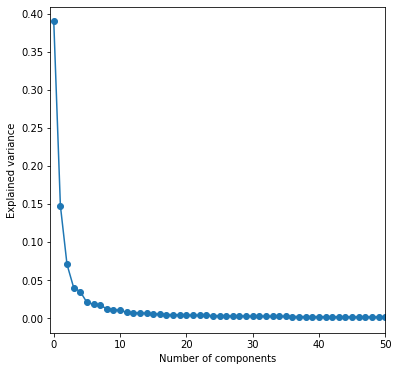

In [5]:
imstack.pca_scree_plot(plot_results=True);

Do PCA analysis and plot results:

NUMBER OF COMPONENTS: 4


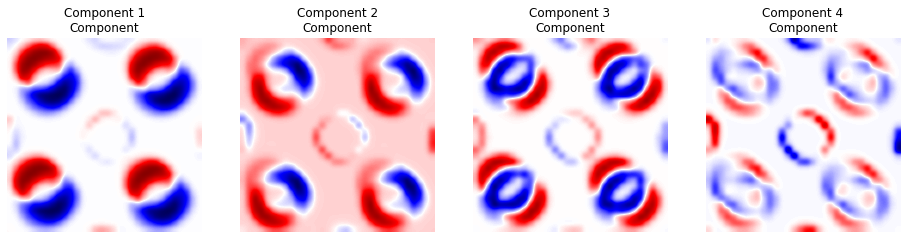

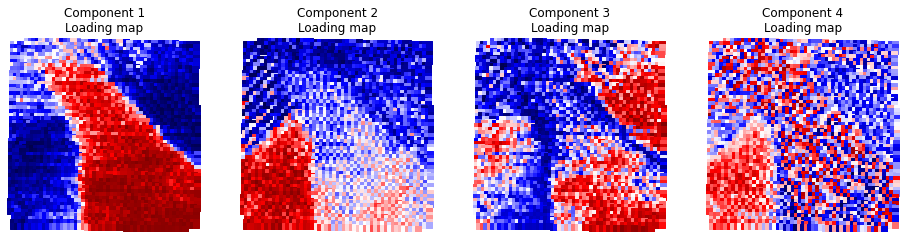

In [6]:
pca_results = imstack.imblock_pca(4, plot_results=True)

Do ICA analysis and plot results:

NUMBER OF COMPONENTS: 4


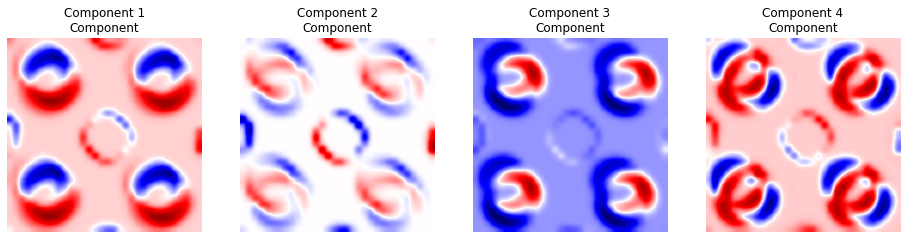

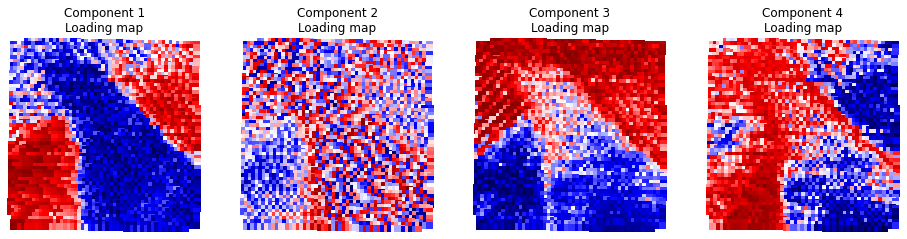

In [7]:
ica_results = imstack.imblock_ica(4, plot_results=True)

Do NMF analysis and plot results:

NUMBER OF COMPONENTS: 4


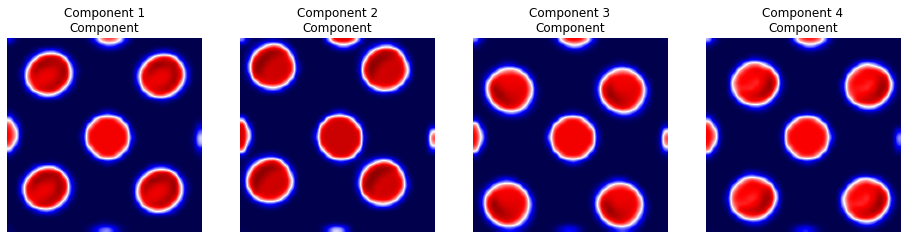

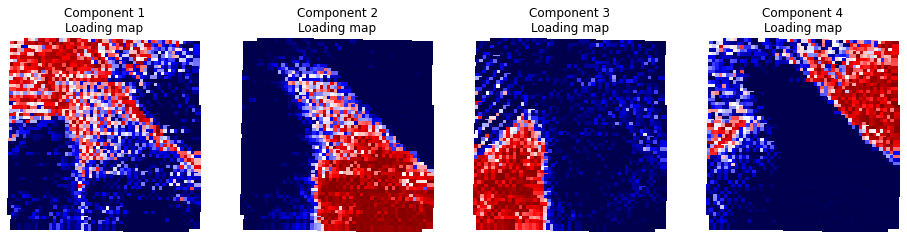

In [8]:
nmf_results = imstack.imblock_nmf(4, plot_results=True)